#Homework 3
#Course - Computation and Visualization 


*   Name - Mayur Mahanta
*   Section - 14075 (03)





In [ ]:
"""
For section 1: You need to write your code in order to regenerate the exact result as shown under each question
For section 2: You need to generate the answers based on the questions without having the sample results.

"""

print(__doc__)


For section 1: You need to write your code in order to regenerate the exact result as shown under each question
For section 2: You need to generate the answers based on the questions without having the sample results.




# Section 1

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


### Q1 - check for missing data

In [40]:
#for null data chech, using the notnull() method and summed it over the values 
#to obtain total number of missing values
print(purchase_data.notnull().sum())

Purchase ID    780
SN             780
Age            780
Gender         780
Item ID        780
Item Name      780
Price          780
dtype: int64


## Player Count

### Q2 - Display the total number of players


In [41]:
#Code for counting the total number of players and 
#assigning it to to a new column to show in a dataframe
data=[purchase_data.SN.unique().size]
df=pd.DataFrame(data,columns=['Total Number of Players'])
df

,Total Number of Players
0,576


### Q3- Purchasing Analysis (Total)

* Obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [42]:
#rounding an average price value
#and transforming it for dollars
unique_Items=purchase_data['Item ID'].unique().size
average_price_val=round(np.average(purchase_data['Price']),2)
average_price_dollars_ct = "${:.2f}".format(average_price_val)
average_price_dollars_ct

#correlating the Purchase Unique Identifier to the average dollors computed

Purchase_ct=purchase_data['Purchase ID'].unique().size
total_Revenue=purchase_data.Price.sum()
total_Revenue_dollars = "${:.2f}".format(total_Revenue)
total_Revenue_dollars

#finally, displaying all of the fields and displaying it using
#a new dataframe
data=[[unique_Items,average_price_dollars_ct,Purchase_ct,total_Revenue_dollars]]
df=pd.DataFrame(data,columns=['Unique items','Average Price','Total Purchases',
                             'Total Revenue'])
df



,Unique items,Average Price,Total Purchases,Total Revenue
0,183,$3.05,780,$2379.77


### Q4- Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [43]:
#computing the total count of other/Non-Disclosed players from the left over
#players under Male and Female
Gender_ct=purchase_data.groupby('Gender')['SN'].nunique()
total_Count=Gender_ct.Male+Gender_ct.Female+Gender_ct['Other / Non-Disclosed']
percent_Male= round(((Gender_ct.Male/total_Count)*100),2)
percent_Female= round(((Gender_ct.Female/total_Count)*100),2)
percent_Other= round(((Gender_ct['Other / Non-Disclosed']/total_Count)*100),2)

#converting to percentage values for male, female and other
male_Percent="{:.2f}%".format(percent_Male)
female_Percent="{:.2f}%".format(percent_Female)
other_Percent="{:.2f}%".format(percent_Other)

#finally, displaying all of the fields and displaying it using
#a new dataframe
data=[['Male',count_Gender.Male,male_Percent],['Female',Gender_ct.Female,female_Percent],
      ['Other/ Non-Disclosed',Gender_ct['Other / Non-Disclosed'],other_Percent]]
df=pd.DataFrame(data,columns=['','Count','Percent of Total Players'])
df


,,Count,Percent of Total Players
0,Male,484,84.03%
1,Female,81,14.06%
2,Other/ Non-Disclosed,11,1.91%



### Q5-Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting




In [48]:
#here we are displaying the mechanism of the groupby in-built function

purchase_data.groupby(['Gender'])['SN'].nunique()
purchase_data.groupby(['Gender'])['Item Name'].nunique()
purchase_data.groupby(['Gender'])['Price'].mean()
purchase_data.groupby(['Gender'])['Price'].sum()

Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64

#### Q6-Display the summary data frame

In [58]:
#describe function for displaying
#the summary data frame
purchase_data.describe()

,Purchase ID,Age,Item ID,Price
count,780.000000,780.000000,780.000000,780.000000
mean,389.500000,22.714103,92.114103,3.050987
std,225.310896,6.659444,52.775943,1.169549
min,0.000000,7.000000,0.000000,1.000000
25%,194.750000,20.000000,48.000000,1.980000
50%,389.500000,22.000000,93.000000,3.150000
75%,584.250000,25.000000,139.000000,4.080000
max,779.000000,45.000000,183.000000,4.990000


In [83]:
total_players = len(purchase_data['SN'].value_counts())

age_bin = [0, 9.99, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 1000]
age_groups =['<10', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+']
purchase_data['Age Group'] = pd.cut(purchase_data['Age'], age_bin, labels=age_groups, include_lowest=True)
agegroup_data_df = purchase_data.groupby('Age Group')
count_player_agegroup = agegroup_data_df['SN'].nunique()
percent_players_agegroup = count_player_agegroup / total_players * 100
age_demographics_df = pd.DataFrame({'Total Count':count_player_agegroup,
                       'Players Percentage':percent_players_agegroup})

age_demographics_df.index.name = None
age_demographics_df.style.format({'Players Percentage':'{:,.2f}%'})

,Total Count,Players Percentage
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


### Q7- Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [88]:
total_players = len(purchase_data['SN'].value_counts())

age_bin = [0, 9.99, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 1000]
age_groups =['<10', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+']
purchase_data['Age Group'] = pd.cut(purchase_data['Age'], age_bin, labels=age_groups, include_lowest=True)
agegroup_data_df = purchase_data.groupby('Age Group')
count_player_agegroup = agegroup_data_df['SN'].nunique()
percent_players_agegroup = count_player_agegroup / total_players * 100
age_demographics_df = pd.DataFrame({'Total Count':count_player_agegroup,
                       'Players Percentage':percent_players_agegroup})

age_demographics_df.index.name = None
age_demographics_df.style.format({'Players Percentage':'{:,.2f}%'})

,Total Count,Players Percentage
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


### Q8- Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [84]:
count_agegroup = agegroup_data_df['SN'].count()
avg_price_agegroup = agegroup_data_df['Price'].mean()
purchase_agegroup = agegroup_data_df['Price'].sum()
person_agegroup= purchase_agegroup / count_player_agegroup
analysis_agegroup = pd.DataFrame({'Purchase Count':count_agegroup,'Average Purchase Price':avg_price_agegroup,'Total Purchase Value':purchase_agegroup,'Avg Total Purchase per Person':person_agegroup})
analysis_agegroup.index.name = 'Age Ranges'
analysis_agegroup.style.format({'Average Purchase Price':'${:,.2f}','Total Purchase Value':'${:,.2f}','Avg Total Purchase per Person':'${:,.2f}'})

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Ranges,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


### Q9-Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [85]:
spend_data_df = purchase_data.groupby('SN')
count_spender = spend_data_df['Purchase ID'].count()
avg_spend_spender = spend_data_df['Price'].mean()
total_spend_sn = spend_data_df['Price'].sum()
spender_analysis = pd.DataFrame({'Purchase Count':count_spender,'Average Purchase Price':avg_spend_spender,'Total Purchase Value':total_spend_sn,})
spender_analysis.sort_values('Total Purchase Value', ascending=False).head().style.format({'Average Purchase Price':'${:,.2f}', 'Total Purchase Value':'${:,.2f}',})

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.41,$13.62
Iskadarya95,3,$4.37,$13.10


### Q10-Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [86]:
items_df = purchase_data[['Item ID', 'Item Name', 'Price']]
idName_df = items_df.groupby(['Item ID', 'Item Name'])
count_purchase = idName_df['Item ID'].count()
total_purchase = idName_df['Price'].sum()
item_price = total_purchase / count_purchase
item_analysis = pd.DataFrame({'Purchase Count':count_purchase,'Item Price':item_price,'Total Purchase Value':total_purchase})
item_analysis.sort_values('Purchase Count', ascending=False).head().style.format({'Item Price':'${:,.2f}', 'Total Purchase Value':'${:,.2f}',})

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


### Q11-Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [87]:
item_analysis.sort_values('Total Purchase Value', ascending=False).head().style.format({'Item Price':'${:,.2f}', 'Total Purchase Value':'${:,.2f}',})

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80


# Section 2

#### Q12: Import the covid-19 dataset provided and set the state as the index of the dataframe.

In [49]:
#importing the covid-19 dataset
df_Covid = pd.read_csv('us_states_covid19_daily.csv')
covid_df=df_Covid
df_Covid=df_Covid.set_index('state')
df_Covid.head()


,death,hospitalized,negative,pending,positive,recovered,total
state,,,,,,,
WY,50,272.0,95212,NaN,5948,4791.0,101160
NE,478,2315.0,410594,NaN,45044,33198.0,455638
ND,191,859.0,219646,NaN,21846,17938.0,241492
NC,3532,NaN,2824239,NaN,210632,184422.0,3034871
MT,180,717.0,330087,NaN,13071,9256.0,343158


#### Q13: Replace all the NaN values in 'pending' column with the string 'None'.

In [50]:
#we are replacing the NaN values in the pending column 
#wiht a string saying = 'none'
df_Covid['pending'].fillna(value = 'None',
          inplace = True)
df_Covid.head()

,death,hospitalized,negative,pending,positive,recovered,total
state,,,,,,,
WY,50,272.0,95212,None,5948,4791.0,101160
NE,478,2315.0,410594,None,45044,33198.0,455638
ND,191,859.0,219646,None,21846,17938.0,241492
NC,3532,NaN,2824239,None,210632,184422.0,3034871
MT,180,717.0,330087,None,13071,9256.0,343158


#### Q14: Replace the NaN values in the 'hospitalized' columns with the mean value of the column.

In [51]:
#we are replacing the NaN values in the hospitalized column 
#wiht a string saying = 'none'
df_Covid['hospitalized'].fillna(value = df_Covid['hospitalized'].mean(),
          inplace = True)
df_Covid.head()

,death,hospitalized,negative,pending,positive,recovered,total
state,,,,,,,
WY,50,272.000000,95212,None,5948,4791.0,101160
NE,478,2315.000000,410594,None,45044,33198.0,455638
ND,191,859.000000,219646,None,21846,17938.0,241492
NC,3532,11044.567568,2824239,None,210632,184422.0,3034871
MT,180,717.000000,330087,None,13071,9256.0,343158


#### Q15: Find the death percentage (round to 2 decimal points) of covid positive patients for each state and add it as a column in the dataset. (death% = death/positive)

In [52]:
#computing the death percentage keeping in mind to round up
#to 2 decimal points 
df_Covid['death percentage'] = round(df_Covid['death']/df_Covid['positive']*100
                                     ,2)
df_Covid.head()

,death,hospitalized,negative,pending,positive,recovered,total,death percentage
state,,,,,,,,
WY,50,272.000000,95212,None,5948,4791.0,101160,0.84
NE,478,2315.000000,410594,None,45044,33198.0,455638,1.06
ND,191,859.000000,219646,None,21846,17938.0,241492,0.87
NC,3532,11044.567568,2824239,None,210632,184422.0,3034871,1.68
MT,180,717.000000,330087,None,13071,9256.0,343158,1.38


#### Q16: Print the total number of negative, positive, and recovered cases in the US.

In [53]:
#displaying total number of patients
#in three new frames
print('Total number of covid negative patients:',df_Covid['negative'].sum())
print('Total number of covid positive patients:',df_Covid['positive'].sum())
print('Total number of covid recovered patients:',df_Covid['recovered'].sum())


Total number of covid negative patients: 92955835
Total number of covid positive patients: 7198622
Total number of covid recovered patients: 2840747.0


#### Q17: What percent of the covid positive patients from the state of NY were hospitalized (round the value to 2 decimal places)?

In [54]:
#displaying the total nymber of Covid Positive Patients
#from the state of NY
print(covid_df.loc[covid_df['state'] == 'NY']['positive'])

17    458649
Name: positive, dtype: int64


#### Q18: Return the state name with the maximum number of covid positive cases

In [55]:
#returning the corresponding state for which patients
#were found out to be positive
print(covid_df.loc[covid_df['positive'] == covid_df['positive'].max()]['state'])

46    CA
Name: state, dtype: object


#### Q19: Return the number of states with more than the mean value of positive cases

In [56]:
#returining the number of states
#with meanvalue for postivie cases >
print(covid_df.loc[covid_df['positive'] > covid_df['positive'].mean()]
      ['state'].count())

19


#### Q20: Print the data of those states whose no of negative cases is greater than the number of negative cases for MT. Then sort the dataframe wrt the total column values in descending order.

In [57]:
#displaying the data of the states
#whose negative cases > negative cases (MT)
print(covid_df.loc[covid_df['negative'] > 
                   covid_df.loc[covid_df['state'] == 'MT']['negative'][4]]
      ['state'])

1     NE
3     NC
7     MO
8     MN
9     MI
10    ME
11    NJ
12    MD
13    NM
14    MA
15    NV
16    LA
17    NY
18    KY
19    OH
20    KS
21    OK
22    IN
23    OR
24    IL
25    PA
28    IA
31    SC
34    GA
35    TN
36    FL
37    TX
39    UT
40    DC
41    VA
42    CT
44    CO
46    CA
47    WA
48    AZ
49    WI
51    WV
52    AR
53    MS
54    AL
55    AK
Name: state, dtype: object


#### Q21: Create a new column called recovery_rate which classifies a state as- 
    a) 'High Recovery' when recovered% > 50
    b) 'Modearate Recovery' when recovered% is between 25 and 50 
    c) 'Low Recovery' when recovered% is less than 25
#### where recovered% = recovered / positive for each state

In [59]:
#creating a new column where the percentage of recovered
# is equated to recovered / positive (For each state)
df_Covid['recovery_percentage'] = (df_Covid['recovered']/df_Covid
                                     ['positive']*100)
df_Covid['recovery_rate'] = pd.cut(df_Covid['recovery_percentage'],
                                     bins = [0,25,50,100], include_lowest=True,
                                     labels=['Low Recovery','Moderate Recovery',
                                             'High Recovery'])
df_Covid

,death,hospitalized,negative,pending,positive,recovered,total,death percentage,recovery_percentage,recovery_rate
state,,,,,,,,,,
WY,50,272.000000,95212,None,5948,4791.0,101160,0.84,80.548083,High Recovery
NE,478,2315.000000,410594,None,45044,33198.0,455638,1.06,73.701270,High Recovery
ND,191,859.000000,219646,None,21846,17938.0,241492,0.87,82.111142,High Recovery
NC,3532,11044.567568,2824239,None,210632,184422.0,3034871,1.68,87.556497,High Recovery
MT,180,717.000000,330087,None,13071,9256.0,343158,1.38,70.813251,High Recovery
NH,439,738.000000,265447,None,8266,7522.0,273713,5.31,90.999274,High Recovery
MP,2,4.000000,15112,None,70,29.0,15182,2.86,41.428571,Moderate Recovery
MO,2118,11044.567568,1178272,None,126113,NaN,1304385,1.68,NaN,NaN
MN,2089,7701.000000,1315567,None,99134,89392.0,1414701,2.11,90.172897,High Recovery


# Plotting pandas using IRIS dataset

#### Note: This problem makes use of the iris data set and depends upon your having completed the previous problem, so please do that first.


In [62]:
#importing the dataset 'iris.csv'
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Q22: Use the built-in pandas plotting tools to make a box-and-whisker plot showing the distribution of petal ratio and sepal ratio for each of the three species. Your plot should have two subplots, one for petal ratio and one for sepal ratio. You may choose the details of your plots (i.e., how to handle outliers, displaying mean vs median, etc) however you think is best. Please include labels on your x- and y-axes and give an appropriate title to your plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa13821220>,
      dtype=object)

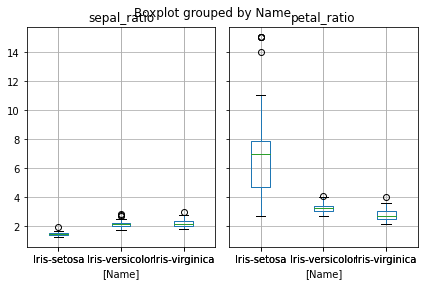

In [64]:
#i've made the petal and sepal ratio taking
#petal length/widght and sepal length/widght
petal_ratio = round(iris['PetalLength']/iris['PetalWidth'], 2)
sepal_ratio = round(iris['SepalLength']/iris['SepalWidth'], 2)

#storing ratio in a newly made columnn
iris['sepal_ratio'] = sepal_ratio
iris['petal_ratio'] = petal_ratio
iris.boxplot(column = ['sepal_ratio', 'petal_ratio'], by = ['Name'])

#### Q23: Use the built-in pandas plotting tools to make a scatter matrix plot for the four original features (petal width, petal length, sepal width and sepal length). Each point in the scatter plot should be colored according to its species. Hint: see the documentation at https://pandas.pydata.org/pandas-docs/stable/visualization.html# scatter-matrix-plot to get started.

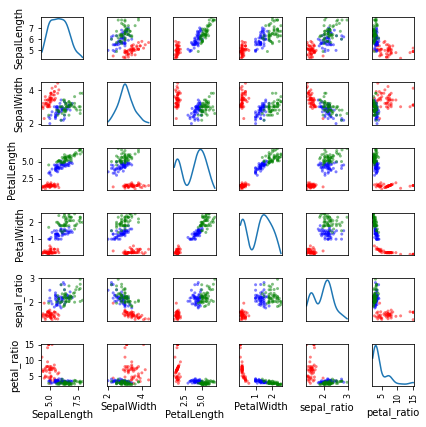

In [65]:
from pandas.plotting import scatter_matrix

colors = []

for i in iris["Name"]:
    if i == 'Iris-setosa':
        colors.append('red')
    elif i=='Iris-versicolor':
        colors.append('blue')
    else: colors.append('green')

pd.plotting.scatter_matrix(iris, color = colors, figsize=(6, 6), diagonal="kde");

## Load the stockprice dataset

In [66]:
#loading the stockprice dataset
stock = pd.read_csv("timeseries_stockprice.csv", header=0) #add header
stock.head()

,Date,Amazon,Google,Facebook
0,5/1/18,927.800,901.94,151.74
1,5/2/18,946.645,909.62,153.34
2,5/3/18,946.000,914.86,153.60
3,5/4/18,944.750,926.07,150.17
4,5/7/18,940.520,933.54,151.45


#### Q24-Plotting a single series

To plot a single series, such as the closing stock price for Amazon for each date, you can simple designate the x-axis values as Date and the y-axis values as Amazon and set the kind parameter to line.

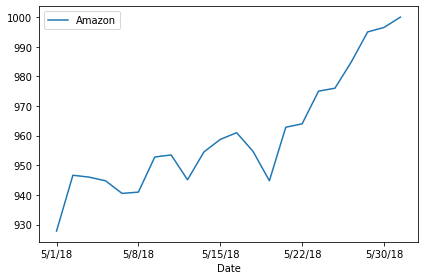

In [68]:
#plotting a single series time data for the Amazaon against the
#date column for timeseries_stockprice.csv
stock.plot(kind = 'line', x = 'Date', y = ['Amazon'])

#### Q25-Plotting two series

When plotting two series, set the y-axis values to a list containing the two column names, each being a data series.

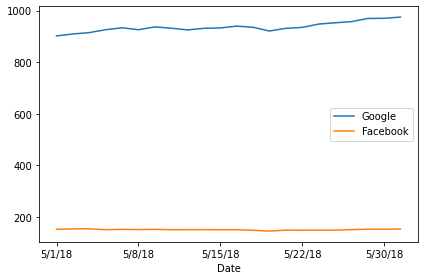

In [69]:
#plotting the two series for Google and Facebook
#showing the values of each column vs Date
stock.plot(kind = 'line', x = 'Date', y = ['Google','Facebook'])

#### Q26- Plotting three series

When plotting three series, set the y-axis values to a list containing the three column names, each being a data series.

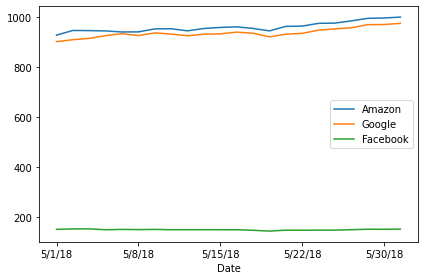

In [70]:
#plotting the two series for Google and Facebook and Amazon
#showing the values of each column vs Date
stock.plot(kind = 'line', x = 'Date', y = ['Amazon','Google','Facebook'])

## Load the following dataset

In [71]:
#loading the mba.csv dataset
import pandas as pd
mydata = pd.read_csv("mba.csv", header=0, index_col ="School") #add header and index
mydata.head()

,Rank,Country,Average_salary,Pre_Salary,Grad_Jobs,PhD,Avg_Age_Students,Avg_Work_Experience,Tuition,Duration
School,,,,,,,,,,
Chicago (Booth),1,US,113217,63,93,96,27,60,106800,21
Dartmouth (Tuck),2,US,115143,62,97,100,28,60,106980,21
Virginia (Darden),3,US,104478,67,95,97,27,60,107800,21
Harvard,4,US,121785,44,97,94,27,48,107000,18
Columbia,5,US,113340,55,98,97,28,60,111736,20


#### Q27-Plot the Box plot using both approach available in pandas: 

    * .plot
    * .boxplot

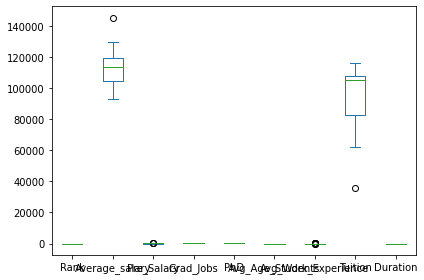

In [72]:
#.plot
#here are plotting the box plot using the first approach
mydata.plot(kind="box")

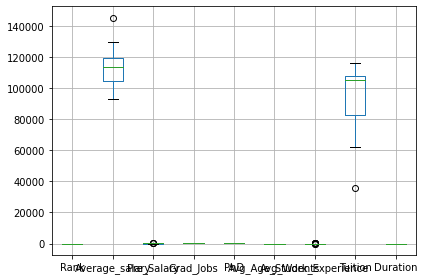

In [73]:
#.boxplot
#here are plotting the box plot using the second approach
mydata.boxplot()

#### Q28- creat a box plot of two variables: "the average student" and "average work experience" in one graph (side by side)

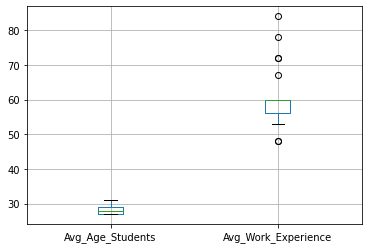

In [30]:
mydata.boxplot(column=['Avg_Age_Students','Avg_Work_Experience'])

#### Q29- Formatting with .boxplot().
change the following parameters for the previous question as grid=False and fontsize=14:

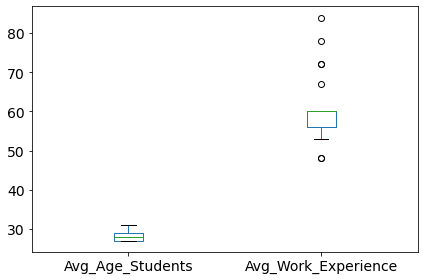

In [76]:
#formatting the .boxplot() to change the formatting

mydata.boxplot(column=['Avg_Age_Students','Avg_Work_Experience'], grid=False, fontsize=14)

#### Q30-Histograms
plot the histogram of Tuitions with proper bins

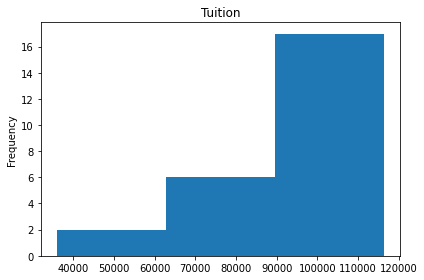

In [79]:
#plotting the histogram with bins = 3
mydata['Tuition'].plot(kind='hist', title='Tuition', bins=3)

#### Q31-Scatter plots
plot the scatter plot using Rank (x-axis) and Grad_job (y-axis) and set the proper xlim

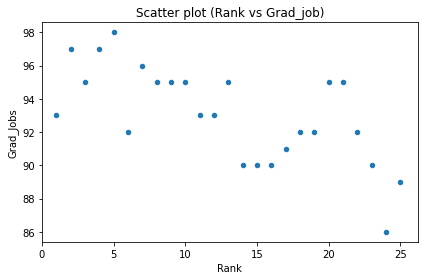

In [80]:
#plotting the scatter plot with
#x label as Rank
#and y label as Grad_jobs
mydata.plot.scatter(x = 'Rank', y = 'Grad_Jobs',
                    title='Scatter plot (Rank vs Grad_job)',xlim=0)

#### Q32-Bar charts
plot horrizontal bar graph for Tuition and assign a proper title for your graph - sort your bar graphs in ascending order

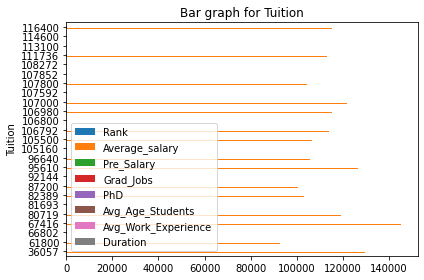

In [81]:
#plotting the scatter plot with
#x label as Tuition
#and Title label as as "Bar Graph for Tuition"
mydata.sort_values(by='Tuition').plot.barh(x='Tuition', 
                                           title="Bar graph for Tuition")

### Q33-Refine the bar chart with a few aesthetic elements.


* The legend parameter is set to False to remove the redundant legend.
* The color parameter can set the color values using RGB. RGB is a way of making colors. You have to provide an amount of red, green and blue + the transparency and it returns a color.
* The edgecolor parameter allows you to set the border of the bars.

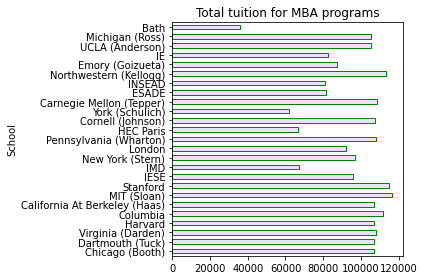

In [82]:
#not showing the legend (legend = False)
#
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) # keeps labels cutoff
mydata.plot(kind='barh', y='Tuition',title='Total tuition for MBA programs',
            legend=False, color=(0.45, 0.23, 0.87, 0.15), edgecolor='green')